<a href="https://colab.research.google.com/github/nacho-pancho/darset/blob/master/demo_RSET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#
# dependencias
#
!pip install pandas

import os

os.chdir('/content')
os.system('git clone http://@github.com/nacho-pancho/darset.git')
os.chdir('/content/darset/data')
os.system('./get_data.sh')
os.chdir('/content/darset/code/')
#
# cargamos modulos
#
import archivos
import filtros
import graficas



  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d7/b1/3367ea1f372957f97a6752ec725b87886e12af1415216feec9067e31df70/numpy-1.16.5-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/87/76/46d697698a143e05f77bec5a526bf4e56a0be61d63425b68f4ba553b51f2/pytz-2019.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl


# Carga de datos y detección de anomalías (DA)

Leyendo archivo SMEC  para la central 5


/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:2380: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


Leyendo archivo scada de central 5: ../data//c5/c5_series10min.sas
9	NSeries								

H	meteo_utm_zona								

H	meteo_utm_zona								

dt: min0:09:59.616000 med=0:09:59.616002 max=0:10:00.480000
Leyendo archivo gen de central 5: ../data//c5/c5_series10minGen.sas
9	NSeries								

H	meteo_utm_zona								

H	meteo_utm_zona								

dt: min0:09:37.670400 med=0:09:59.961600 max=0:10:00.480000
Leyendo archivo de pronósticos para la central 5
tini=2015-10-01 00:00:00 tfin=2019-05-31 23:50:00 period=1338 days, 23:50:00
t_per_pixel=16:04:04.500000
potSCADA
potSMEC10m
cgmSCADA
velSCADA
dirSCADA
velPRONOS
dirPRONOS
velGEN
redraw
window: (datetime.datetime(2015, 10, 1, 0, 0), datetime.datetime(2015, 10, 8, 0, 0))
2015-10-01 00:00:00 2015-10-07 23:50:00


/home/nacho/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/workspace/content/darset/code/graficas.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(len(tipos)+1,1,idx_tipo+1)


2015-10-01 00:30:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00
2015-10-01 00:00:00 2015-10-07 23:50:00


/workspace/content/darset/code/graficas.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot( len(tipos)+1, 1, i+1 )


{'vel': ['velSCADA', 'velPRONOS', 'velGEN'], 'dir': ['dirSCADA', 'dirPRONOS'], 'cgm': ['cgmSCADA'], 'pot': ['potSCADA', 'potSMEC10m']}
0 10


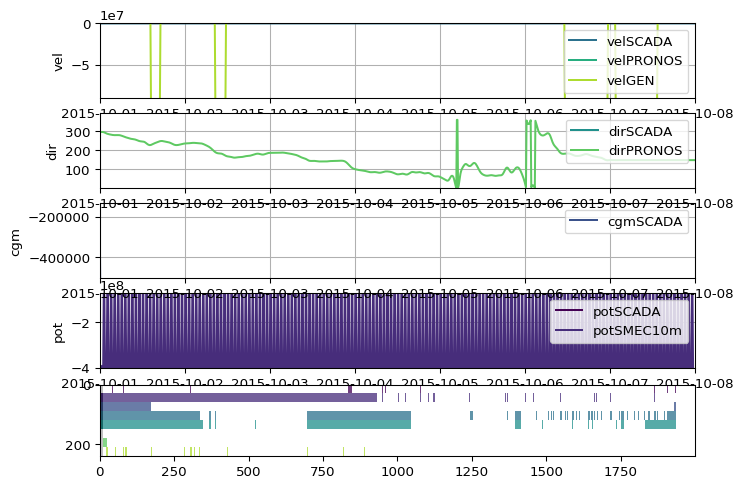

In [0]:
import matplotlib.pyplot as plt

nidCentral = 5
med_10min, med_15min = archivos.leerArchiSMEC(nidCentral)
parque = archivos.leerArchi(nidCentral,'scada')
parque2 = archivos.leerArchi(nidCentral,'gen') 
medidor_pronos10min = archivos.leerArchiPRONOS(nidCentral,10)

parque.pot_SMEC  = med_10min

vel_SCADA = parque.medidores[0].get_medida('vel')
dir_SCADA = parque.medidores[0].get_medida('dir')
vel_GEN = parque2.medidores[0].get_medida('vel')

vel_pronos10min = medidor_pronos10min.get_medida('vel')
dir_pronos10min = medidor_pronos10min.get_medida('dir')


#filtro_total = dir_SCADA.filtrada()

meds = []
meds.append(parque.pot)
meds.append(parque.pot_SMEC)
meds.append(parque.cgm)

meds.append(vel_SCADA)
meds.append(dir_SCADA)

meds.append(vel_pronos10min)
meds.append(dir_pronos10min)

meds.append(vel_GEN)


plt.close('all')
graficas.clickplot(meds)
plt.show()



# Reconstrucción de datos faltantes (RSET)

En esta etapa la idea es estimar los valores de las series en los puntos que por distintas razones sus valores no pudieron ser relevados. Hay numerosas técnicas. Empezaremos por la más simple, que son los modelos AutoRegresivos Multivariados lineales (MVAR). Asumimos que la correlación cruzada entre distintas series y la autocorrelación de la serie es lineal (cosa no cierta en general) y en base a eso construiremos un modelo predictivo lineal para imputar los datos faltanes. 

Vayamos por partes

## Modelo autoregresivo simple (AR)

Aquí se trata de una única serie $x^n=(x[1],\ldots,x[n])$ que se asume estacionaria en sentido amplio (WSS), o sea que su varianza, media y autocorrelación no dependen del tiempo. El modelo AR de orden $p$ asume lo siguiente:

$$ x[t] = \sum_{k=1}^p a[k] x[t-k] + z[t] $$

donde $z[t]$ es un proceso WGN (White Gaussian Noise), es decir sus muestras son realizaciones de una v.a. $Z \sim \mathcal{N}(0,1)$.

Dados los $a[k]$, la estimación de mínimos cuadrados de $x[t]$ es simplemente su valor esperado, es decir

$$ \hat{x}[t] = E[\;X|x[t-1],\ldots,x[t-k]\;] = \sum_{k=1}^p a[k] x[t-k]$$.

## Modelo multivariado simple

Pasamos ahora al caso en que  $x[t] \in \mathbb{R}^m$. Asumamos que $x[t]$ es un proceso Gaussiano multivariado con matriz de correlación $\Sigma$, es decir sus muestras son realizaciones de $X \sim \mathcal{N}(0,\Sigma)$, donde $\Sigma = E[XX^T]$.
Nuevamemte podemos usar esta información para estimar $X_i[t]$ en función de las otras variables. Supongamos sin pérdida de generalidad que queremos estimar $x_1[t]$, tenemos que la estimación de mínimos cuadrados $\hat{x}_i[t] = E[\; X_1 | x_2[t],\ldots,x_m[t]\;] = $.

